# Flownets
<p>Flownets are a method of determining groundwater flow that follows a nonuniform path, such as flow down and under a dam. Unlike in the first formulations of groundwater flow, vertical flow is incorporated into this model. The purpose of a flownet is to display equipotential lines on a graph and separate the flow into separate stream tubes.</p>
<br>
<p>For this example, I use a vertical cross-section with a dam in the center. The hydraulic head is higher on one side than the other, and flow is directed down and under the dam. Just like before, groundwater flows from regions of high hydraulic head to low, though now it may also flow downward. This means that the hydraulic head in a single column is not the same, which causes water to flow downwards on the region with higher head and downwards in the region with lower head.</p>

In [151]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from matplotlib import colors

# The format of impermeable is: (lowerX, upperX, lowerY, upperY)
def check(i,j, impermeable):
    '''
    If this function returns True, it means that the given indices are NOT
    part of an impermeable barrier. In the flow function, this function is called
    to check if the given cell is a barrier, as well as before the queue is calculated
    for each element.
    '''
    if not ((impermeable[0] <= j <=impermeable[1]) and (impermeable[2] <= i <=impermeable[3])):
        return True
    else:
        #print("Caught a barrier: {} {}".format(i,j))
        return False
    


def verticalFlowSimple(heads, impermeable, conductivity):
    queue = np.zeros(heads.shape)
    length = heads.shape[1]
    depth = heads.shape[0]
    corners = ((0,0),(0, length-1), (depth-1, 0),(depth-1,length-1))
    
    for i in range(depth):
        for j in range(length):
            # Check if corner
            if not check(i,j,impermeable):
                pass
            elif (i,j) in corners:
                
                # Top left corner
                if (i,j) == corners[0]:
                    # Check to see if the index is in the bad range of numbers
                    if check(i + 1,j,impermeable):
                        queue[0,0] += heads[1,0] - heads[0,0]   # Down
                    if check(i + 1,j,impermeable):
                        queue[0,0] += heads[0,1] - heads[0,0]   # Left
                        
                # Top right corner
                elif (i,j) == corners[1]:
                    if check(i + 1, j, impermeable):
                        queue[i,j] += heads[1,j] - heads[0,j]   # Down
                    if check(i, j - 1, impermeable):
                        queue[i,j] += heads[i,j - 1] - heads[i,j] # Left
                        
                # Bottom left corner
                elif (i,j) == corners[2]:
                    if check(i - 1,j,impermeable):
                        queue[i,j] += heads[i - 1,j] - heads[i,j]   # Up
                    if check(i, j + 1, impermeable):
                        queue[i,j] += heads[i,j + 1] - heads[i,j]   # Right
                        
                else:
                    if check(i - 1, j, impermeable):
                        queue[i,j] += heads[i - 1,j] - heads[i,j]   # Up
                    if check(i, j - 1, impermeable):
                        queue[i,j] += heads[i, j - 1] - heads[i,j]  # Left
                    
                
            # Check if on edge
            elif ((i == 0 or i == depth - 1) or (j == 0 or j == length - 1)):
                # Top edge
                if i == 0:
                    if check(i + 1,j, impermeable):
                        queue[i,j] += heads[i + 1,j] - heads[i,j]  # Down
                    if check(i,j - 1, impermeable):
                        queue[i,j] += heads[i,j - 1] - heads[i,j]  # Left
                    if check(i, j + 1, impermeable):
                        queue[i,j] += heads[i,j + 1] - heads[i,j]  # Right
                        
                # Bottom edge
                elif i == depth - 1:
                    if check(i - 1,j, impermeable):
                        queue[i,j] += heads[i - 1,j] - heads[i,j]  # Up
                    if check(i,j - 1, impermeable):
                        queue[i,j] += heads[i,j - 1] - heads[i,j]  # Left
                    if check(i, j + 1, impermeable):
                        queue[i,j] += heads[i,j + 1] - heads[i,j]  # Right
                        
                # Left edge
                elif j == 0:
                    if check(i - 1,j, impermeable):
                        queue[i,j] += heads[i - 1,j] - heads[i,j]  # Up
                    if check(i + 1,j, impermeable):
                        queue[i,j] += heads[i + 1,j] - heads[i,j]  # Down
                    if check(i, j + 1, impermeable):
                        queue[i,j] += heads[i,j + 1] - heads[i,j]  # Right
                
                # Right edge
                else:
                    if check(i - 1,j, impermeable):
                        queue[i,j] += heads[i - 1,j] - heads[i,j]  # Up
                    if check(i + 1,j, impermeable):
                        queue[i,j] += heads[i + 1,j] - heads[i,j]  # Down
                    if check(i, j + 1, impermeable):
                        queue[i,j] += heads[i,j - 1] - heads[i,j]  # Left
                        
            # Execute main function
            else:
                if check(i - 1,j, impermeable):
                    queue[i,j] += heads[i - 1,j] - heads[i,j]  # Up
                if check(i + 1,j, impermeable):
                    queue[i,j] += heads[i + 1,j] - heads[i,j]  # Down
                if check(i, j + 1, impermeable):
                    queue[i,j] += heads[i,j + 1] - heads[i,j]  # Right
                if check(i,j - 1, impermeable):
                    queue[i,j] += heads[i,j - 1] - heads[i,j]  # Left
    
    heads += queue*conductivity
    return heads



                

### Explanation of the function
<p>In this new (really quite ugly) function, I am doing essentially what the previous function does: Calculate the head difference between adjacent cells and store that difference in a queue. Following this, the function then multiplies the queue by the hydraulic conductivity and applies the changes to the surrounding hydraulic heads. In order for this present formulation to work, the medium must be both heterogeneous and isotropic. I have neglected any time step or specific storage for the moment. The variable <b>impermeable</b> represents the impermeable region. At the moment, it an only represent rectangles.</p>
<p>When plotting the head values on a colormap, some formulations show a good gradient flowing around the barrier, but sometimes they show a weird gradient pattern that I think happens because the differences don't differ enough.</p>
<p>Things to improve:</p>

- Take into account pressure or saturation of blocks.
- Create custom color maps
- Create equipotential lines

<p>While the colors are useful, I cannot totally see what the shape of the flow is. I can see that flow is fastest just around the edge of the barrier, but I can't tell by how much. In order to do so, I'll need some equipotential lines. Below, I have implemented an example of the using the code. 
</p>

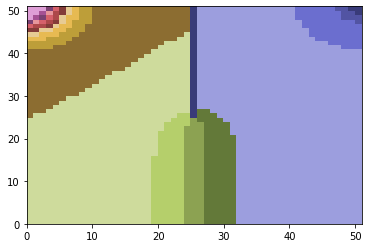

Wall time: 9.2 s


In [166]:
%%time
length = 51   # Set the square dimensions of the array
heads = np.zeros((length,length))

# Set some initial values
heads[:,:int(length/2)] = 10
heads[:,int(length/2)] = -1
heads[:,int(length/2) + 1:] = 4
heads[0:int(length/2) + 1,int(length/2) + 1] = 10


impermeable = (int(length/2),int(length/2),int(length/2), length-1)   # Setting the coordinates of an impermeable barrier

conductivity = .05   # More of a scaling factor than anything else

for i in range(500):  # Run function 500 times
    heads = verticalFlowSimple(heads, impermeable, conductivity)
    #heads[-1,0:int(length/2)] += 1
    heads[-1,0] += 1
    #heads[-1,(int(length/2) + 1):] = 0    # Set 
    heads[-1,-1] = 0    # Set the top right value equal to zero

plt.pcolormesh(heads, vmin = 0, vmax = 25, cmap = cm.tab20b)
plt.show()

### Code Explanation
<p>The above graph shows a point value input in the top left corner, while the box in the top left corner is set at a constant value of zero. The blue line right in the middle represents an impermeable object. Because of that, the flow around the barrier is effectively a U-shape from left to right. Just from my own experience, it seems to be generally correct. It is really quite a small and simple model though, so I don't know how well it would reflect reality. I need more information to make it more accurate.</p>

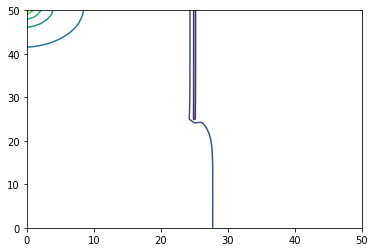

In [167]:
plt.contour(heads)
plt.show()

In [87]:
# Edges
#------------------------------------------------------------------------------
def isEdge(arr, y, x):
    # Checks if the given value and positions are on an edge and NOT a corner
    if x == 0 or y == 0 or x == arr.shape[1]-1 or y == arr.shape[0]-1:
        return True
    else:
        return False
    
def isTopEdge(arr, y, x):
    # Checks if the given value is on the top edge
    if y == arr.shape[0]-1 and not (x==0 or x==arr.shape[1]-1): 
        return True
    else: 
        return False
    
def isBottomEdge(arr, y, x):
    # Checks if the given value is on the bottom edge
    if y == 0 and not (x==0 or x==arr.shape[1]-1):
        return True
    else:
        return False
    
def isLeftEdge(arr,y,x):
    # Checks if the position is on the left edge
    if x == 0 and not (y==0 or y==arr.shape[0]-1):
        return True
    else:
        return False
    
def isRightEdge(arr,y,x):
    # Checks if the position is on the right edge
    if x == arr.shape[1]-1 and not (y==0 or y==arr.shape[0]-1):
        return True
    else:
        return False
    
# Corners
#-------------------------------------------------------------------------    
def isCorner(arr,y,x):
    if (x == 0 or x == arr.shape[1] - 1) and (y == 0 or arr.shape[0] - 1):
        return True
    else:
        return False
    
def isBottomLeftCorner(arr,y,x):
    # Checks if the position is the bottom left
    if x==0 and y==0:
        return True
    else:
        return False
    
def isTopLeftCorner(arr,y,x):
    # Checks if the position is the top left
    if x == 0 and y == arr.shape[0]-1:
        return True
    else:
        return False
    
def isBottomRightCorner(arr,y,x):
    # checks if the position is the bottom right
    if x == arr.shape[1]-1 and y == 0:
        return True
    else:
        return False
    
def isTopRightCorner(arr,y,x):
    # Checks if the position is the top right
    if x == arr.shape[1]-1 and y == arr.shape[0]-1:
        return True
    else:
        return False
#--------------------------------------------------------------
    

def equipotentialLine(heads, posX, posY, impermeable):
    '''
    Begins at specified point and determines a path that will keep it roughly at a constant
    hydraulic head value, if possible.
    '''
    
    eqPtsX = [posX]
    eqPtsY = [posY]
    standard = heads[posY, posX]
    
    while not (isCorner(heads,eqPtsY[-1],eqPtsX[-1]) or 
               isEdge(heads,eqPtsY[-1],eqPtsY[-1])):
        # Check corner
        if isCorner(heads,posY,posX): 
            print('Found a corner:')
            print('x:', posX)
            print('y:', posY)
            if isTopRightCorner(heads,posY,posX):
                eqPtsX.append(posX)
                eqPtsY.append(posY)
                break
                
            elif isTopLeftCorner(heads,posY,posX):
                eqPtsX.append(posX)
                eqPtsY.append(posY)
                break 
                
            elif isBottomLeftCorner(heads,posY,posX):
                eqPtsX.append(posX)
                eqPtsY.append(posY)
                break
                
            elif isBottomRightCorner(heads,posY,posX):
                eqPtsX.append(posX)
                eqPtsY.append(posY)
                break
            
        # Check for edges
        elif isEdge(heads,posY,posX):
            print('Found an edge:')
            print('x:', posX)
            print('y:', posY)
            if isTopEdge(heads,posY,posX):
                eqPtsX.append(posX)
                eqPtsY.append(posY)
                break
            elif isBottomEdge(heads,posY,posX):
                eqPtsX.append(posX)
                eqPtsY.append(posY)
                break
            elif isLeftEdge(heads,posY,posX):
                eqPtsX.append(posX)
                eqPtsY.append(posY)
                break
            elif isRightEdge(heads,posY,posX):
                eqPtsX.append(posX)
                eqPtsY.append(posY)
                break
                
        else:
            #print('Made it to else')
            up    = abs((standard - heads[posY + 1,posX])/standard)
            down  = abs((standard - heads[posY - 1,posX])/standard)
            left  = abs((standard - heads[posY,posX - 1])/standard)
            right = abs((standard - heads[posY,posX + 1])/standard)
            
            vals = [up,down,left,right]
            
            rounded = [round(val,2) for val in vals]
            
            print('vals:',rounded)
            
            # Up
            if (min(vals) == up) and not (posX in eqPtsX and posY + 1 in eqPtsY) and not (up == heads[posY + 1, posX]):
                print('Choosing up')
                eqPtsX.append(posX)
                eqPtsY.append(posY + 1)
                posX, posY = posX, posY + 1
                continue
                
            vals = vals[1:]
                
            # Down
            if (min(vals) == down) and not (posX in eqPtsX and posY - 1 in eqPtsY) and not (up == heads[posY - 1, posX]):
                print('Choosing down')
                eqPtsX.append(posX)
                eqPtsY.append(posY - 1)
                posX, posY = posX, posY - 1
                continue
                
            vals = vals[1:]
            
            # Left
            if (min(vals) == left) and not (posX - 1 in eqPtsX and posY in eqPtsY) and not (up == heads[posY, posX - 1]):
                print('Choosing left')
                eqPtsX.append(posX - 1)
                eqPtsY.append(posY)
                posX, posY = posX - 1, posY
                continue
                
            vals = vals[1:]
            
            # Right
            if (min(vals) == right) and not (posX + 1 in eqPtsX and posY in eqPtsY) and not (up == heads[posY, posX + 1]):
                print('Choosing right')
                eqPtsX.append(posX + 1)
                eqPtsY.append(posY)
                posX, posY = posX + 1, posY
                continue
                
            # Other?
            print('Took other path in else, something went wrong')
            print(vals)
            break

    print('Ending now at:')
    print('Final x:',posX)
    print('Final y:',posY)
    return eqPtsX, eqPtsY


